In [29]:
!pip install pandas seaborn matplotlib openpyxl



In [30]:
import pandas as pd



In [31]:
import numpy as np


In [32]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [33]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [35]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [37]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [38]:
df = df.dropna()


In [39]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [40]:
df['Churn'].value_counts()


,count
Churn,
No,5163
Yes,1869


In [41]:
churn_rate = (1869 / 7032) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 26.58%


In [42]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0–12m', '12–24m', '24–48m', '48–72m'])


/tmp/ipython-input-42-3418143216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TenureGroup'] = pd.cut(df['tenure'],


In [43]:
df[['tenure', 'TenureGroup']].head(10)

,tenure,TenureGroup
0,1,0–12m
1,34,24–48m
2,2,0–12m
3,45,24–48m
4,2,0–12m
5,8,0–12m
6,22,12–24m
7,10,0–12m
8,28,24–48m
9,62,48–72m


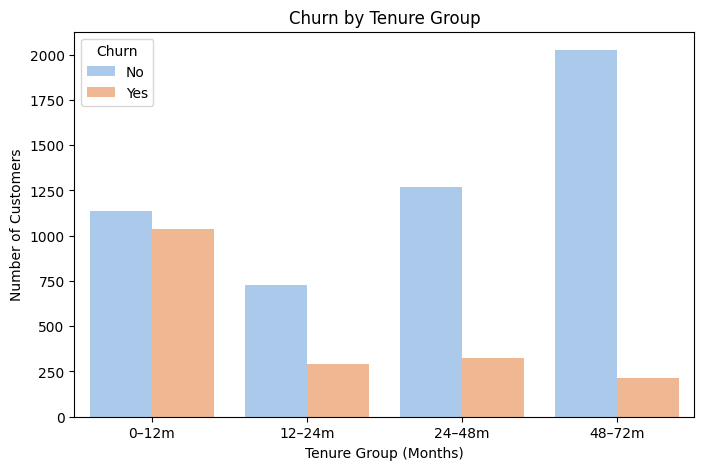

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TenureGroup', hue='Churn', palette='pastel')
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


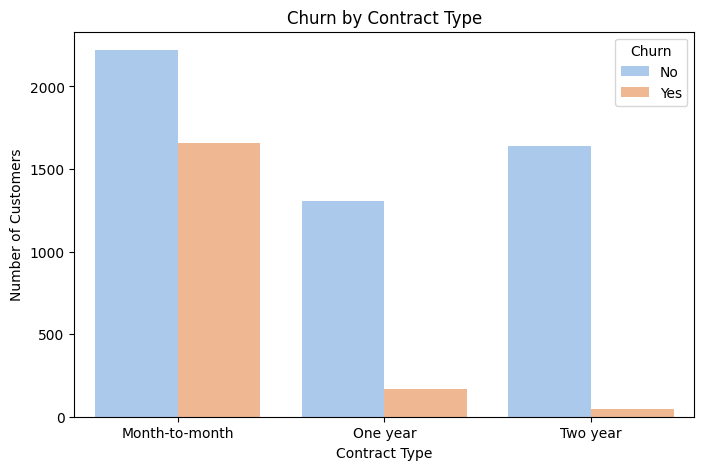

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


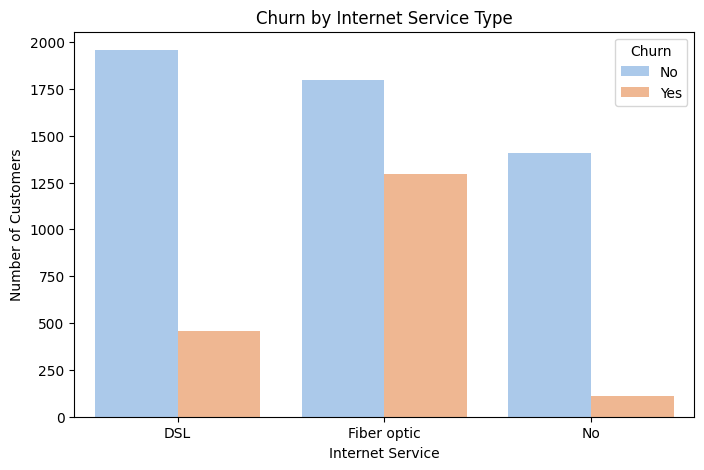

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='pastel')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()


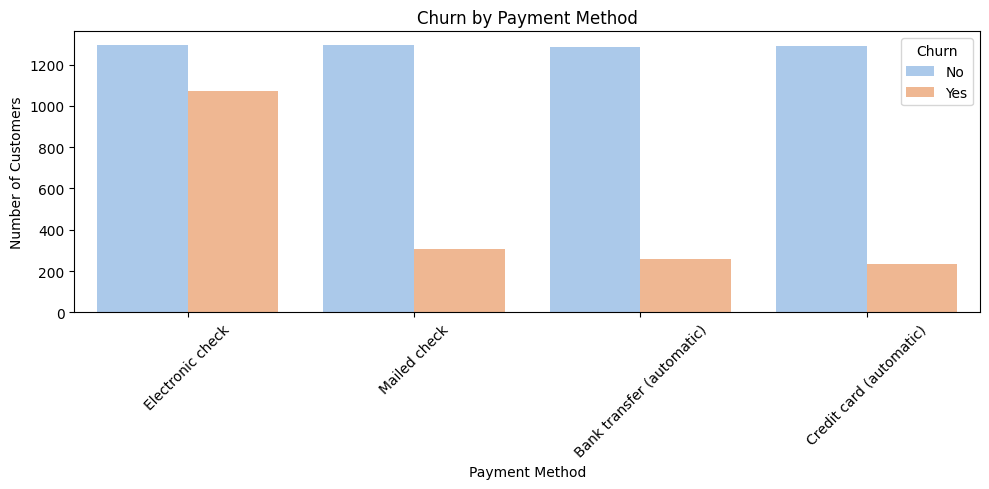

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()



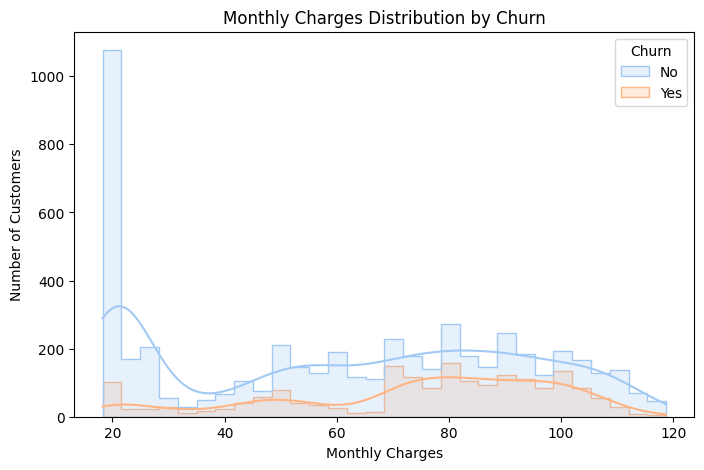

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, palette='pastel', element='step')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()


In [49]:
df.to_csv('cleaned_telco_churn.csv', index=False)


In [50]:
from google.colab import files
files.download('cleaned_telco_churn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>